## Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Intern Academy Internship/SALESDATA.csv')
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,30/04/2017,-237.91,2017/04/30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,30/04/2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,14/07/2017,368.79,2017/07/14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,14/07/2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,17/10/2017,109.73,2017/10/17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,16/10/2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,03/06/2017,-211.75,2017/06/03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,03/06/2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,27/05/2017,96627.94,2017/05/27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,28/05/2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [ ]:
df.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [ ]:
df.shape

(65282, 20)

In [ ]:
df.nunique()

CustKey                               615
DateKey                               559
Discount Amount                     17820
Invoice Date                          559
Invoice Number                      24681
Item Class                              2
Item Number                           983
Item                                  657
Line Number                           397
List Price                           1062
Order Number                        17798
Promised Delivery Date                592
Sales Amount                        17896
Sales Amount Based on List Price     4060
Sales Cost Amount                    5513
Sales Margin Amount                 21296
Sales Price                         14789
Sales Quantity                        281
Sales Rep                              64
U/M                                     3
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  int64  
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  int64  
 5   Item Class                        56993 non-null  object 
 6   Item Number                       65241 non-null  object 
 7   Item                              65282 non-null  object 
 8   Line Number                       65282 non-null  int64  
 9   List Price                        65282 non-null  float64
 10  Order Number                      65282 non-null  int64  
 11  Promised Delivery Date            65282 non-null  object 
 12  Sale

In [ ]:
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


## Null Values

In [ ]:
df.isna().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

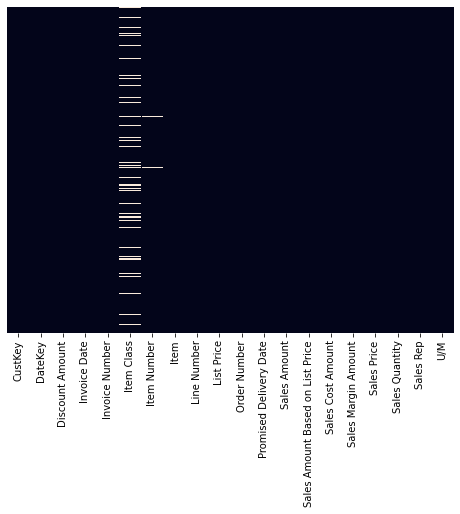

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna(),yticklabels=0,cbar=False)
plt.show()

## Duplicate Values

In [ ]:
df.duplicated().sum()

0

## Types of Analysis we could do


1. Basic univariate analysis
2. Sales vs date plot
3. Month wise sales
4. Orders vs time
5. Top selling items by various factors
6. Repeatedly purchased items
7. Outliers detection
8. How discounts affects sales and profit
9. Most regular customers and Most profitable customers


## Items that are repeatedly brought

In [ ]:
# calculate item score based on repetition
item = []
score = []
i = 0
j=0
for row in df.groupby(['Item','CustKey'])['CustKey'].count().index:
    if row[0] not in item:
        if j>1:
            score[-1] /= j
        j = 1
        item.append(row[0])
        score.append(df.groupby(['Item','CustKey'])['CustKey'].count()[i])
    else:
        j += 1
        score[-1] += df.groupby(['Item','CustKey'])['CustKey'].count()[i]
    i+=1

In [ ]:
# convert to dataframe
df1 = pd.DataFrame({
    'items':item,
    'score':score
}).sort_values(by='score',ascending=False)

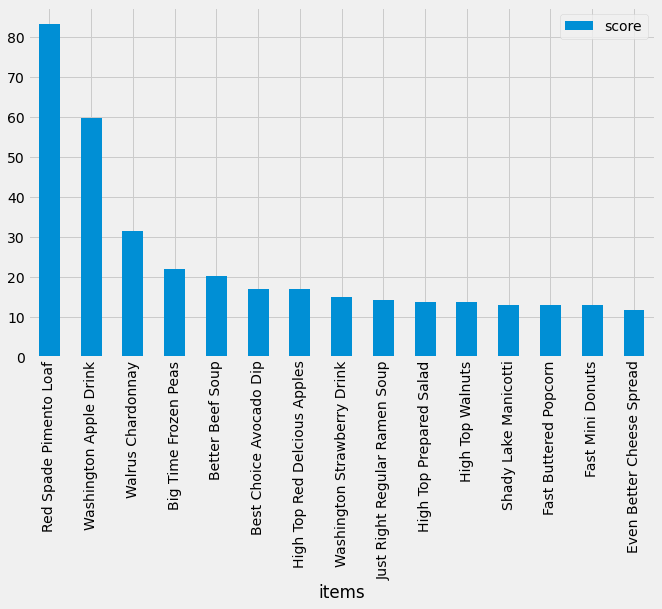

In [ ]:
# plot
df1.set_index('items',inplace=True)
plt.style.use('fivethirtyeight')
df1.head(15).plot(kind='bar',figsize=(10,6),style='fivethirtyeight')
plt.show()

In [ ]:
# export to csv
df1.to_csv('repeatedly_brought.csv')